In [1]:
%matplotlib inline

# Compute centrality scores

This example shows how to compute centrality scores, given a spatial
graph and cell type annotation.

The scores calculated are closeness centrality, degree centrality and
clustering coefficient with the following properties:

> -   closeness centrality - measure of how close the group is to other
>     nodes.
> -   clustering coefficient - measure of the degree to which nodes
>     cluster together.
> -   degree centrality - fraction of non-group members connected to
>     group members.

All scores are descriptive statistics of the spatial graph.

::: seealso
See `sphx_glr_auto_examples_graph_compute_spatial_neighbors.py` for
general usage of `squidpy.gr.spatial_neighbors`.
:::


In [2]:
import squidpy as sq

adata = sq.datasets.imc()
adata

AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


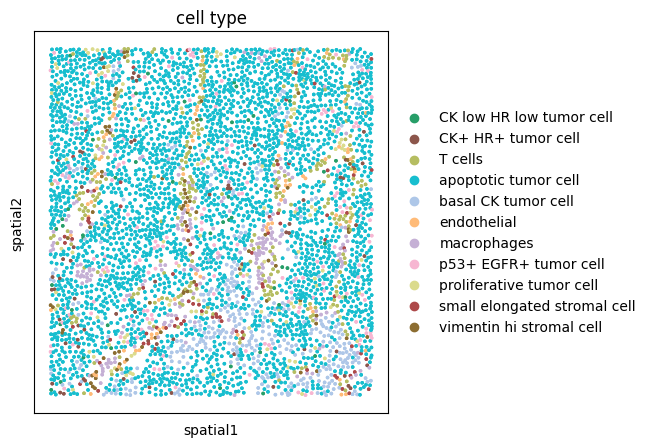

In [7]:
sq.pl.spatial_scatter(adata, shape=None, color='cell type', size=10)

This dataset contains cell type annotations in `anndata.AnnData.obs`,
which are used for calculation of centrality scores. First, we need to
compute a connectivity matrix from spatial coordinates. We can use
`squidpy.gr.spatial_neighbors` for this purpose.


In [4]:
sq.gr.spatial_neighbors(adata)

Centrality scores are calculated with `squidpy.gr.centrality_scores`.


In [5]:
sq.gr.centrality_scores(adata, "cell type")

And visualize results with `squidpy.pl.centrality_scores`.


/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


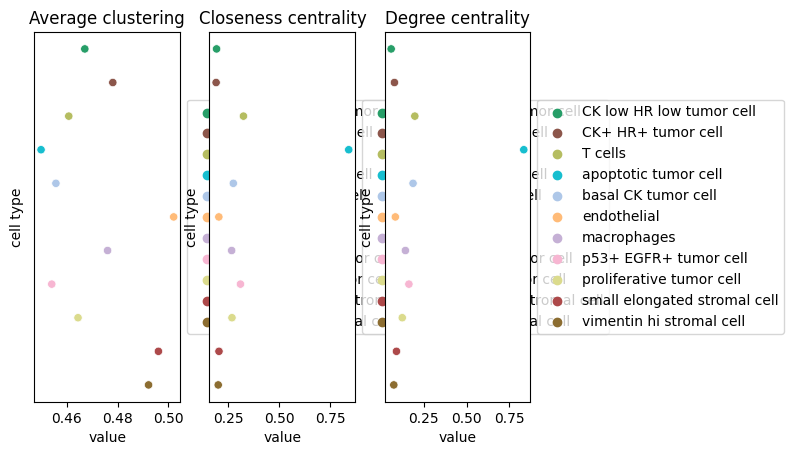

In [10]:
sq.pl.centrality_scores(adata, "cell type")

> IDF: let us inspect the behaviour of cell types in the different scores

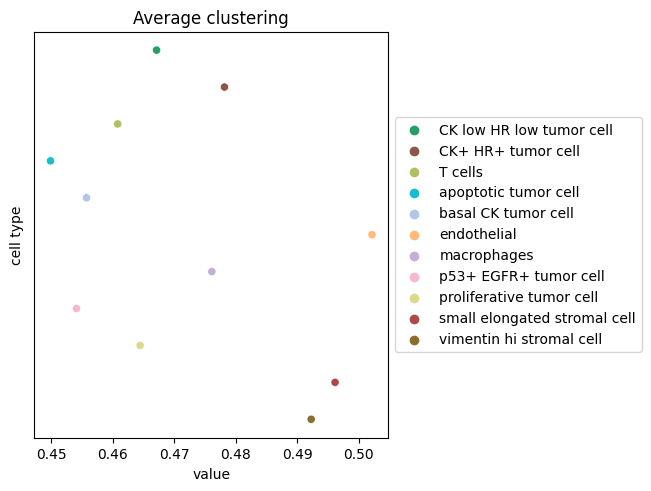

In [13]:
sq.pl.centrality_scores(adata, cluster_key='cell type', score='average_clustering')

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


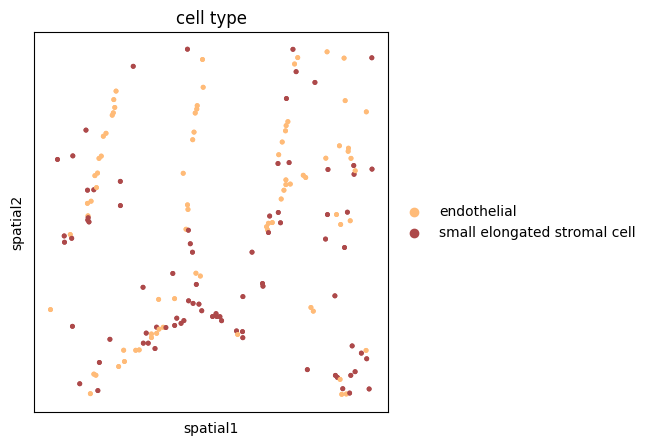

In [19]:
sq.pl.spatial_scatter(adata, shape=None, color='cell type', groups=['endothelial', 'small elongated stromal cell'])

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


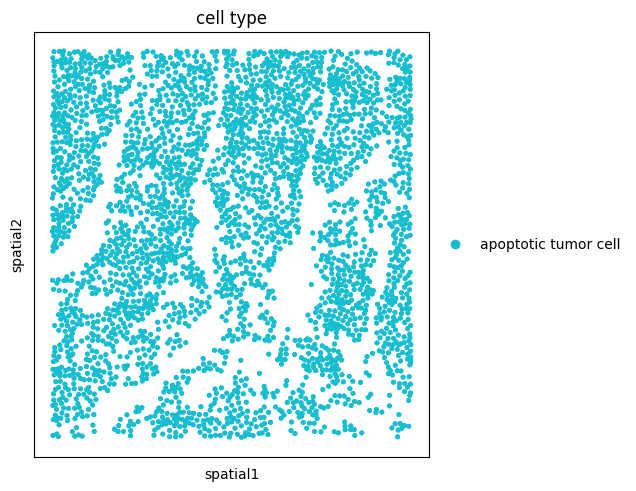

In [20]:
sq.pl.spatial_scatter(adata, shape=None, color='cell type', groups=['apoptotic tumor cell'])

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


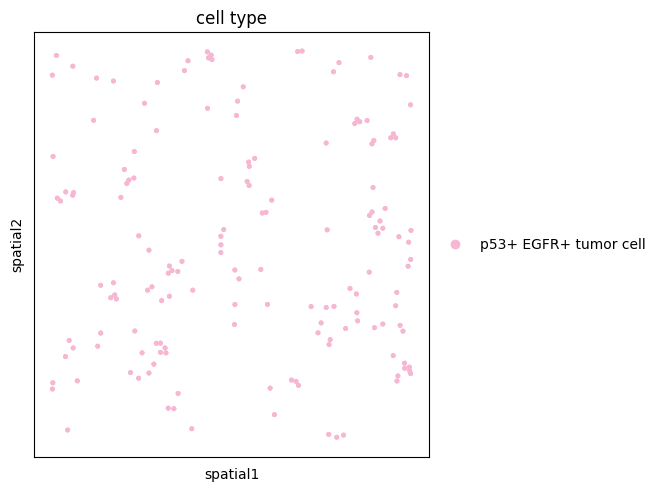

In [21]:
sq.pl.spatial_scatter(adata, shape=None, color='cell type', groups=['p53+ EGFR+ tumor cell'])

> IDF: the clustering coefficient or 'average clustering' seems like a good metric for general cell type clustering 

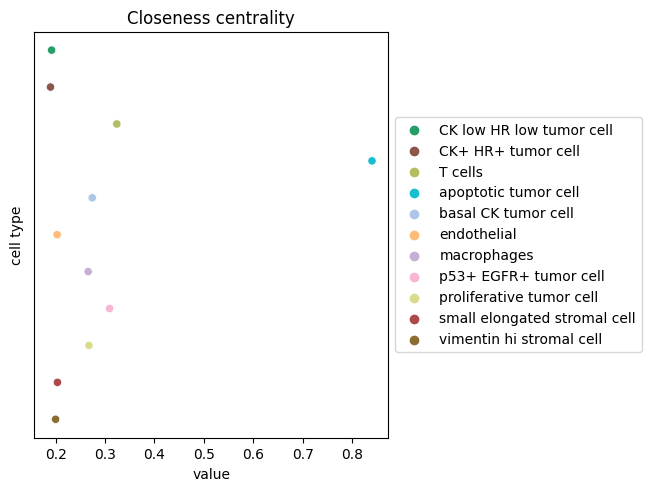

In [23]:
sq.pl.centrality_scores(adata, cluster_key='cell type', score='closeness_centrality')

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


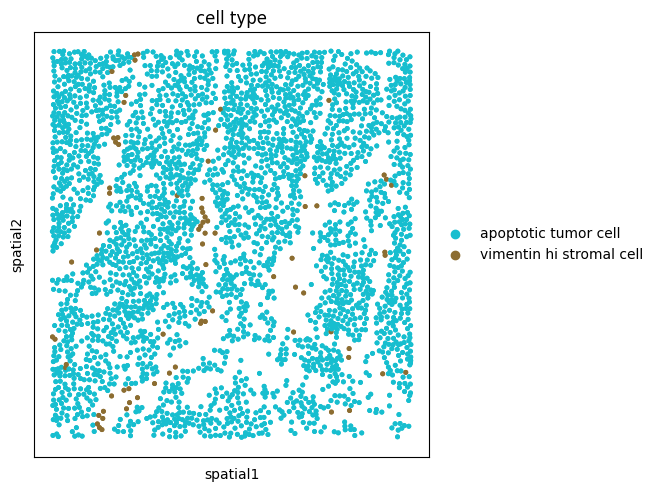

In [25]:
sq.pl.spatial_scatter(adata, shape=None, color='cell type', groups=['apoptotic tumor cell', 'vimentin hi stromal cell'])

> IDF: the closeness centrality coefficient seeems like a good measure for proximity between a certain cell type and the rest

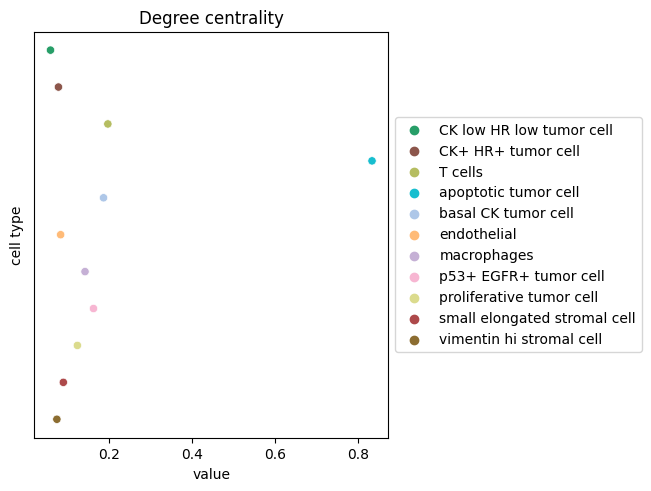

In [7]:
sq.pl.centrality_scores(adata, cluster_key='cell type', score='degree_centrality')

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


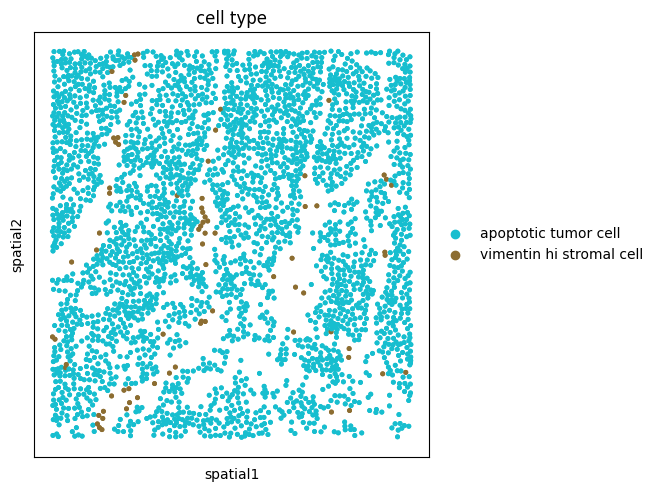

In [25]:
sq.pl.spatial_scatter(adata, shape=None, color='cell type', groups=['apoptotic tumor cell', 'vimentin hi stromal cell'])

> IDF: In light of the previous closeness centrality score, which is a quantitative measure, the **degree centrality** seems to be an insightful counterpart based on relational proportions of non-query-cluster nodes to query-cluster nodes

> All in all, the centrality scores use spatial graph statistics to describe the distribution of a group of cells with regard to the rest of the nodes:
> - Use closeness centrality to quantitatively measure the distances of non-group nodes to group-nodes
> - Use the degree centrality to proportionally measure the fraction of non-group nodes that are connected to the group nodes
> - use the clustering coefficient to calculate the degree to which group nodes cluster together.